In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime

from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
#from statsmodels.tsa.ar_model import AutoReg
#from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore") 

In [3]:
data= pd.read_csv('SBI_Historical_Data.csv')
data.head()

FileNotFoundError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


Q. 1	As part of EDA, perform the following tasks:
a.	Print dimensions of the data
b.	Dimensions of Dataset
c.	Statistical Summary
d.	Converting Date
e.	Check Data Type and Missing Values
f.	Index the dataset with Date	[30]


In [ ]:
data.shape

(1385, 7)

b.	Dimensions of Dataset

In [ ]:
data.ndim

2

c.	Statistical Summary

In [ ]:
data.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [ ]:
df=data.drop(labels=['Open','High','Low','Vol.','Change %'], axis= 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1385 non-null   object 
 1   Price   1385 non-null   float64
dtypes: float64(1), object(1)
memory usage: 21.8+ KB


d.	Converting Date
f.	Index the dataset with Date

In [ ]:
df.Date = pd.to_datetime(df.Date, format= '%Y-%m-%d')
df.index = df.Date
df.head()

,Date,Price
Date,,
2020-08-07,2020-08-07,190.65
2020-08-06,2020-08-06,190.95
2020-08-05,2020-08-05,191.45
2020-08-04,2020-08-04,191.60
2020-08-03,2020-08-03,192.25


e.	Check Data Type and Missing Values

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1385 entries, 2020-08-07 to 2015-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1385 non-null   datetime64[ns]
 1   Price   1385 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.5 KB


Date     0
Price    0
dtype: int64

In [ ]:
df=df.sort_index(ascending=True)
df.head()

,Date,Price
Date,,
2015-01-01,2015-01-01,314.00
2015-01-02,2015-01-02,315.25
2015-01-05,2015-01-05,312.75
2015-01-06,2015-01-06,299.90
2015-01-07,2015-01-07,300.15


In [ ]:
df1=df.resample('MS').mean()
df1['2017':]

,Price
Date,
2017-01-01,252.897619
2017-02-01,272.478947
2017-03-01,275.254545
2017-04-01,288.886111
2017-05-01,295.136364
2017-06-01,285.483333
2017-07-01,289.345238
2017-08-01,288.376190
2017-09-01,268.014286


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2015-01-01 to 2020-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   68 non-null     float64
dtypes: float64(1)
memory usage: 3.1 KB


Q. 2	Perform time series analysis:

a.	Visualize time series data

Exploratory Data Analysis

In [ ]:
# set up plot functions
# lineplot
def plt_(dataset):
    plt.figure(figsize=(12,8))
    plt.plot(dataset, color ='b')
    plt.show()

# distplot
def density_plt_(dataset):
    plt.figure(figsize=(12,8))
    sns.distplot(dataset)
    plt.show()

# Decomposition of additive model
def decomp_plot_add(dataset):
    decomposition = seasonal_decompose(dataset,model="additive",period=12)
    fig = plt.figure(figsize=(20,10))
    plt.title('Decomposition of Additive Model')
    ax=fig.add_subplot(411)
    ax.plot(dataset, label= 'Original', color = 'b')
    ax.legend(loc= 'best')
    ax=fig.add_subplot(412)
    ax.plot(decomposition.trend, label= 'Trend', color= 'b')
    ax.legend(loc= 'best')
    ax=fig.add_subplot(413)
    ax.plot(decomposition.seasonal, label= 'Seasonal', color= 'b')
    ax.legend(loc= 'best')
    ax=fig.add_subplot(414)
    ax.plot(decomposition.resid, label='Residuals', color='b')
    ax.legend(loc= 'best')

    plt.show()
# Decomposition of multiplicative model
def decomp_plot_mul(dataset):
    decomposition = seasonal_decompose(dataset,model="multiplicative",period=12)
    fig = plt.figure(figsize=(20,10))
    plt.title('Decomposition of Additive Model')
    ax=fig.add_subplot(411)
    ax.plot(dataset, label= 'Original', color = 'b')
    ax.legend(loc= 'best')
    ax=fig.add_subplot(412)
    ax.plot(decomposition.trend, label= 'Trend', color= 'b')
    ax.legend(loc= 'best')
    ax=fig.add_subplot(413)
    ax.plot(decomposition.seasonal, label= 'Seasonal', color= 'b')
    ax.legend(loc= 'best')
    ax=fig.add_subplot(414)
    ax.plot(decomposition.resid, label='Residuals', color='b')
    ax.legend(loc= 'best')
    plt.show()

Lineplot for the dataset

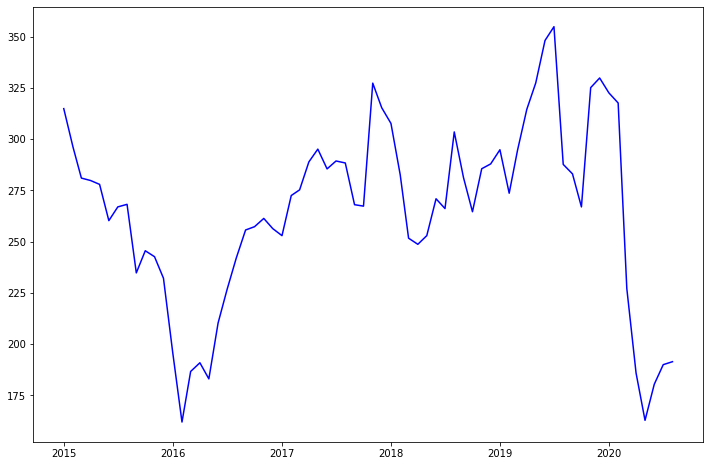

In [ ]:
plt_(df1)

Distplot for the dataset

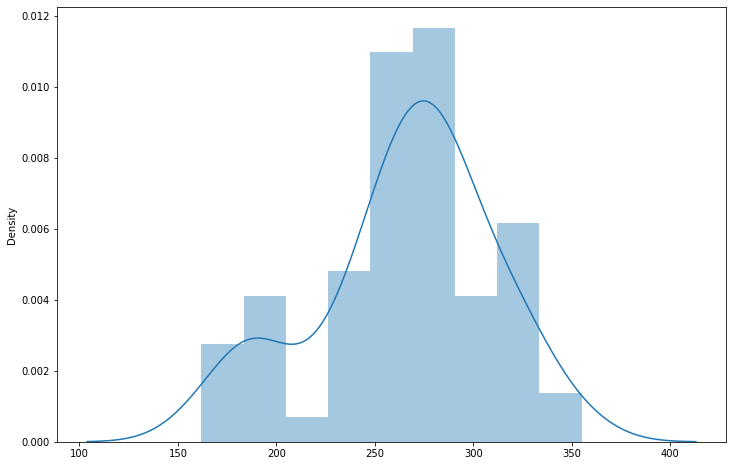

In [ ]:
density_plt_(df1)

Decomposition plot fro the Dataset

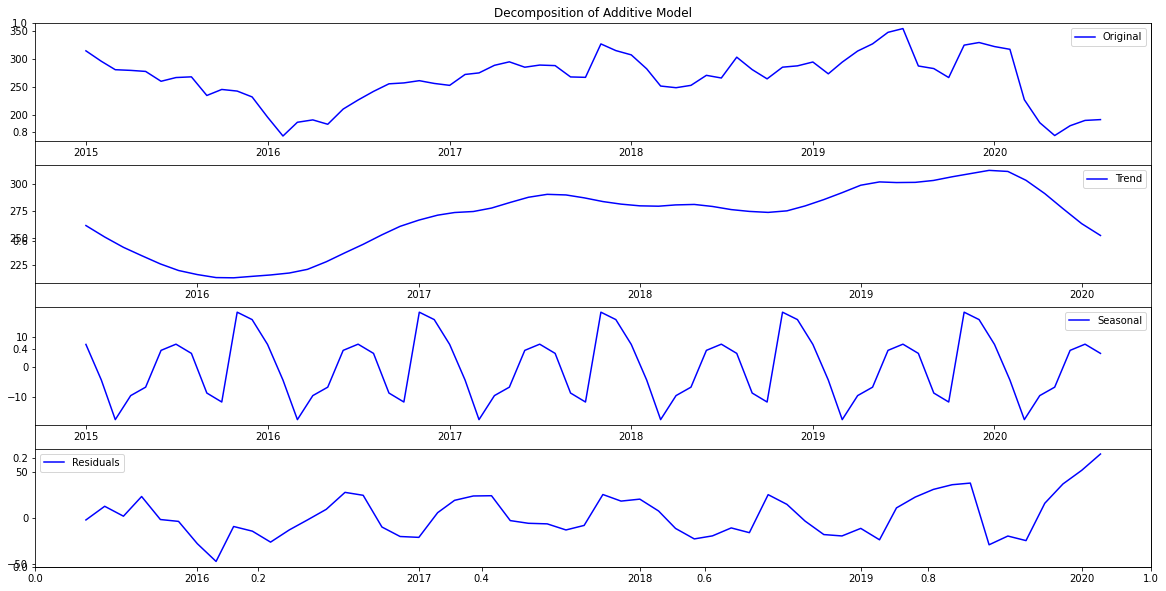

In [ ]:
decomp_plot_add(df1)

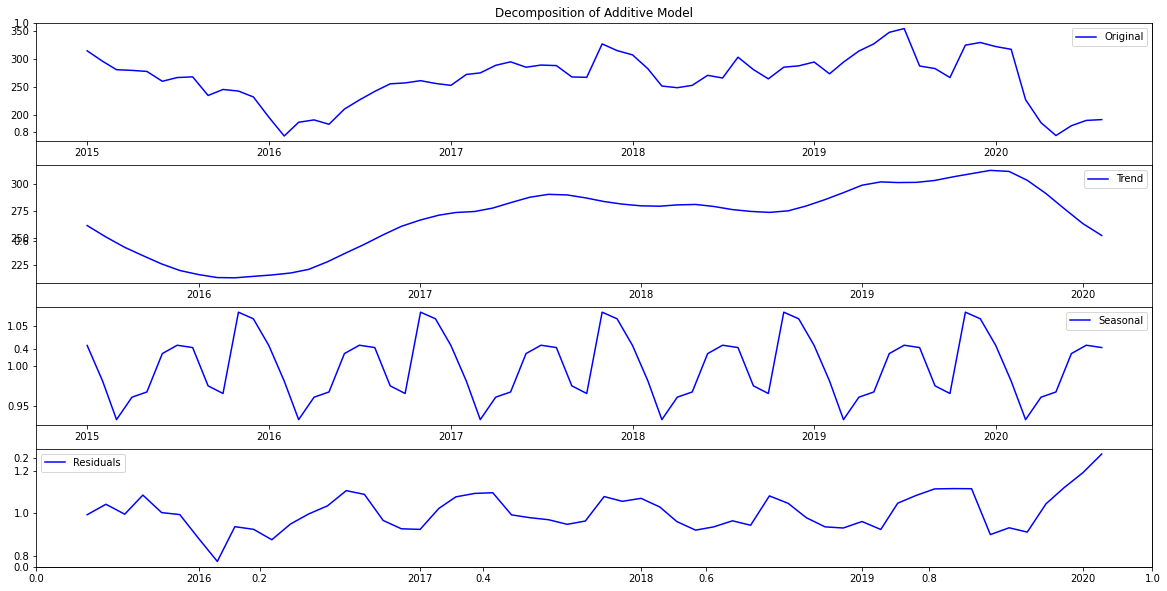

In [ ]:
decomp_plot_mul(df1)

b.	Check Stationarity with:
-	ADF Test
-	KPSS Test


Checking for Stationarity using ADfuller test

In [ ]:
def stationary_test_adf(dataset):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(dataset, autolag = 'AIC')
    dftests_output = pd.Series(dftest[0:2],index = ['Test statistic','p_value'])
    print(dftests_output)
    print("\n")
    if dftests_output['p_value']>0.05:
        print('Accepting h0. The given Dataset is not Stationary')
    else:
        print('Rejecting h0. The given Dataset is Stationary')

In [ ]:
stationary_test_adf(df1)

Results of Dickey-Fuller Test:
Test statistic   -2.460279
p_value           0.125440
dtype: float64


Accepting h0. The given Dataset is not Stationary


Checking for Stationarity using KPSS test

In [ ]:
def stationary_test_kpss(dataset):
    print('Results of KPSS Test:')
    kpsstest = kpss(dataset)
    kpsstests_output = pd.Series(kpsstest[0:2],index = ['Test statistic','p_value'])
    print(kpsstests_output)
    print("\n")
    if kpsstests_output['p_value']>0.05:
        print('Accepting h0. The given Dataset is Stationary')
    else:
        print('Rejecting h0. The given Dataset is not Stationary')



In [ ]:
stationary_test_kpss(df1)

Results of KPSS Test:
Test statistic    0.201291
p_value           0.100000
dtype: float64


Accepting h0. The given Dataset is Stationary


c.	Perform decomposing

<AxesSubplot:xlabel='Date'>

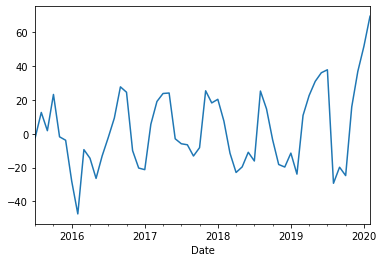

In [ ]:
decomposition = seasonal_decompose(df1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
residual.dropna(inplace=True)
residual.plot()

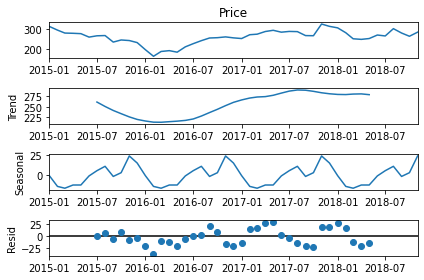

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Price).plot()
result = sm.tsa.stattools.adfuller(train.Price)
plt.show()

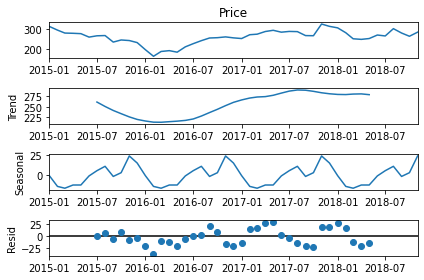

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Price).plot()
result = sm.tsa.stattools.kpss(train.Price)
plt.show()

Visualizing ACF and PACF plots

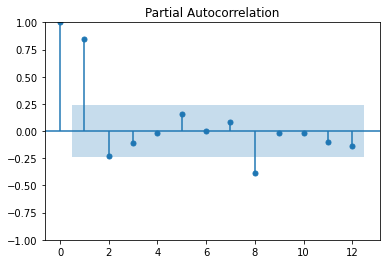

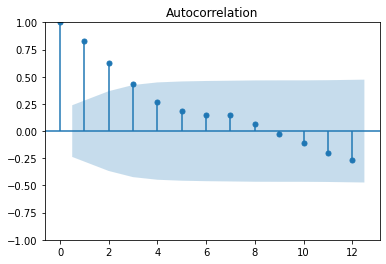

In [ ]:
plot_pacf(df1,lags=12)
plot_acf(df1,lags=12)
plt.show()

From this, Both ACF and PACF has Geometric Decay------So "Auto Regressive Integrated Moving Average (ARIMA) Model" would be effective for the Dataset.

Model Building

Moving Average Model

In [ ]:
def moving_avg_forecasting(mydf,colval,split):
    #print(split)
    import math
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    dd = np.asarray(train[colval])
    y_hat = test.copy()
    y_hat['moving_avg'] = train[colval].rolling(len(test)).mean().iloc[-1]
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['moving_avg'], label='Moving Average')
    plt.legend(loc='best')
    plt.title("Moving Average Forecast")
    plt.show()
    mse = mean_squared_error(test[colval], y_hat.moving_avg)
    print('MSE = '+str(mse))
    rmse = sqrt(mean_squared_error(test[colval], y_hat.moving_avg))
    print('RMSE = '+str(rmse))

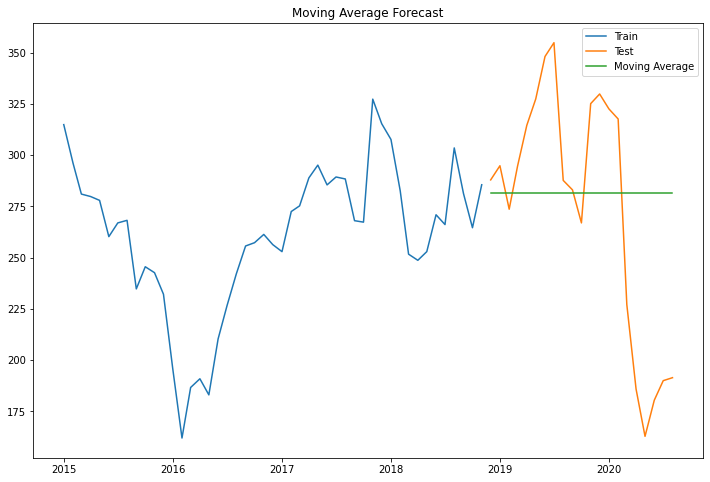

MSE = 3523.1226335949227
RMSE = 59.35589805229909


In [ ]:
moving_avg_forecasting(df1,'Price',0.7)

Naive Approach

In [ ]:
def naive_forecasting(mydf,coltime,colval,split):
    #print(split)
    import math
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    dd = np.array(train[colval])
    lastvalue = dd[len(dd)-1]
    y_hat = test.copy()
    y_hat['naive'] = lastvalue
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    plt.figure(figsize=(12,8))
    plt.plot(train[coltime], train[colval], label='Train')
    plt.plot(test[coltime],test[colval], label='Test')
    plt.plot(y_hat[coltime],y_hat['naive'], label='Naive Forecast')
    plt.legend(loc='best')
    plt.title("Naive Forecast")
    plt.show()
    mse = mean_squared_error(test[colval], y_hat.naive)
    print('MSE = '+str(mse))
    rmse = sqrt(mean_squared_error(test[colval], y_hat.naive))
    print('RMSE = '+str(rmse))

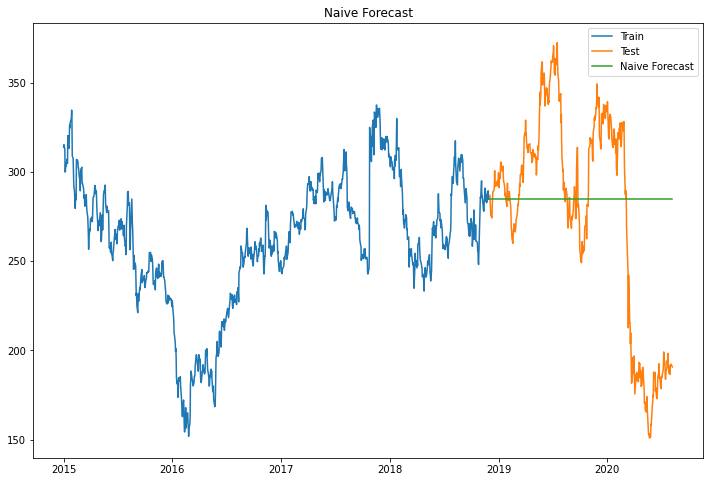

MSE = 3558.8804387019222
RMSE = 59.65635287797874


In [ ]:
naive_forecasting(df,'Date','Price',0.7)

1. AR Model

In [ ]:
def AR_forecasting(mydf,colval,split):
    #print(split)
    import math
    from statsmodels.tsa.api import Holt
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    model = AutoReg(train[colval],lags=12)
    fit1 = model.fit()
    y_hat['AR'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['AR'], label='AR')
    plt.legend(loc='best')
    plt.title("Autoregression (AR) Forecast")
    plt.show()
    mse= mean_squared_error(test[colval], y_hat.AR)
    rmse= sqrt(mean_squared_error(test[colval], y_hat.AR))
    print('MSE = '+str(mse))
    print('RMSE = '+str(rmse))

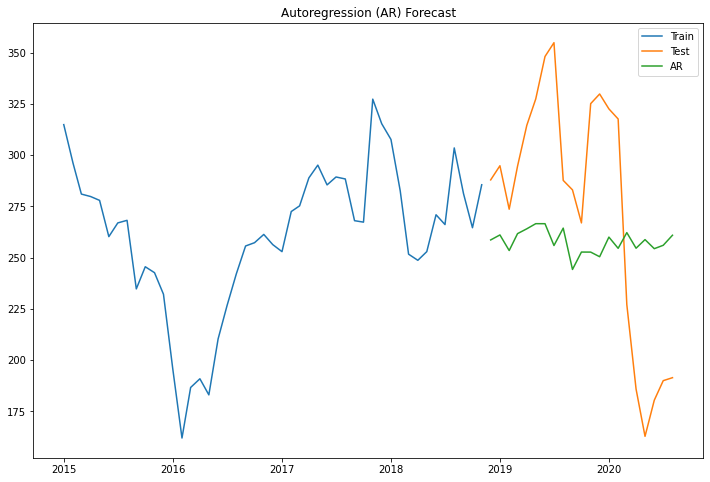

MSE = 3703.7865833608944
RMSE = 60.85874286707617


In [ ]:
AR_forecasting(df1,'Price',0.7)

SIMPLE EXPONENTIAL SMOOTHENING (SES)

In [ ]:
def SES_forecasting(mydf,colval,split):
    #print(split)
    import math
    from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    fit2 = SimpleExpSmoothing(np.asarray(train[colval])).fit(smoothing_level=0.6,optimized=False)
    y_hat['SES'] = fit2.forecast(len(test))
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['SES'], label='SES')
    plt.legend(loc='best')
    plt.title("Simple Exponential Smoothing (SES)")
    plt.show()
    mse=mean_squared_error(test[colval], y_hat.SES)
    rmse = sqrt(mean_squared_error(test[colval], y_hat.SES))
    print('MSE = '+str(mse))
    print('RMSE = '+str(rmse))

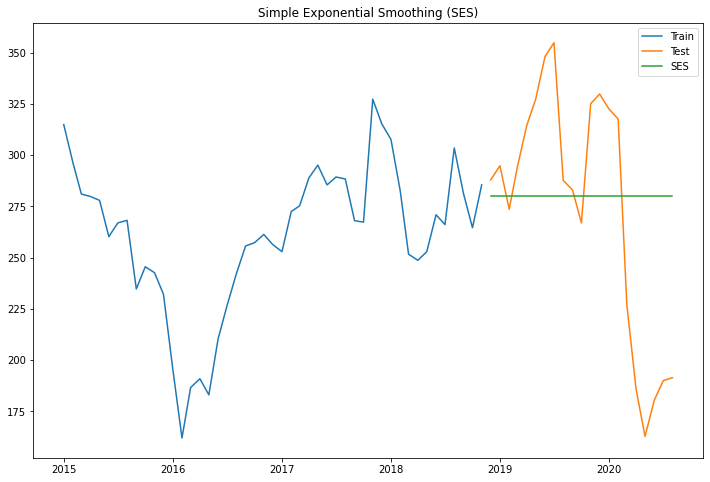

MSE = 3504.784489982796
RMSE = 59.20122034200643


In [ ]:
SES_forecasting(df1,'Price',0.7)

HOLT'S LINEAR MODEL(DOUBLE EXPONENTIAL MODEL):

In [ ]:
def Holt_linear_forecasting(mydf,colval,split):
    #print(split)
    import math
    from statsmodels.tsa.api import Holt
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    fit1 = Holt(np.asarray(train[colval])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
    y_hat['Holt_linear'] = fit1.forecast(len(test))
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['Holt_linear'], label='Holt Linear')
    plt.legend(loc='best')
    plt.title("Holt Linear Forecast")
    plt.show()
    mse = mean_squared_error(test[colval], y_hat.Holt_linear)
    rmse = sqrt(mean_squared_error(test[colval], y_hat.Holt_linear))
    print('MSE = '+str(mse))
    print('RMSE = '+str(rmse))

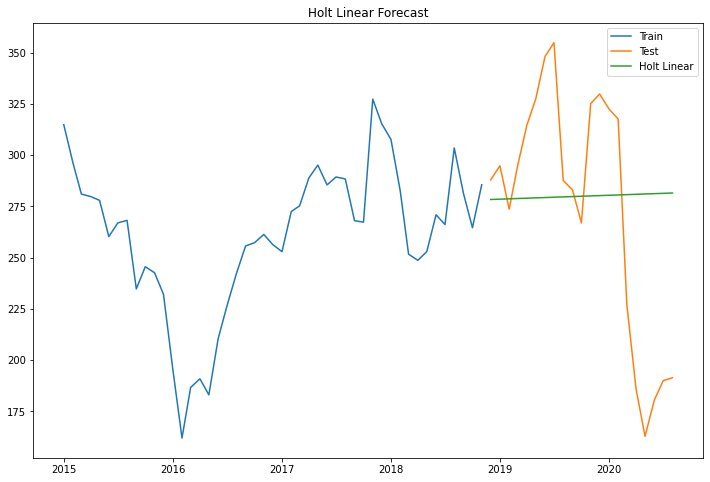

MSE = 3576.447497591237
RMSE = 59.803407073437185


In [ ]:
Holt_linear_forecasting(df1,'Price',0.7)

HOLT-WINTER MODEL(TRIPLE EXPONENTIAL MODEL):

In [ ]:
def Holt_Winter_forecasting(mydf,colval,split, seasonal_per, trend, seasonal):
    #print(split)
    import math
    from statsmodels.tsa.api import Holt
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    fit1 = ExponentialSmoothing(np.asarray(train[colval]),seasonal_periods=seasonal_per,trend=trend, seasonal=seasonal,).fit()
    y_hat['Holt_Winter'] = fit1.forecast(len(test))
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['Holt_Winter'], label='Holt Winter')
    plt.legend(loc='best')
    plt.title("Holt Winter Forecast")
    plt.show()
    mse=(mean_squared_error(test[colval], y_hat.Holt_Winter))
    rmse = sqrt(mean_squared_error(test[colval], y_hat.Holt_Winter))
    print('MSE = '+str(mse))
    print('RMSE = '+str(rmse))

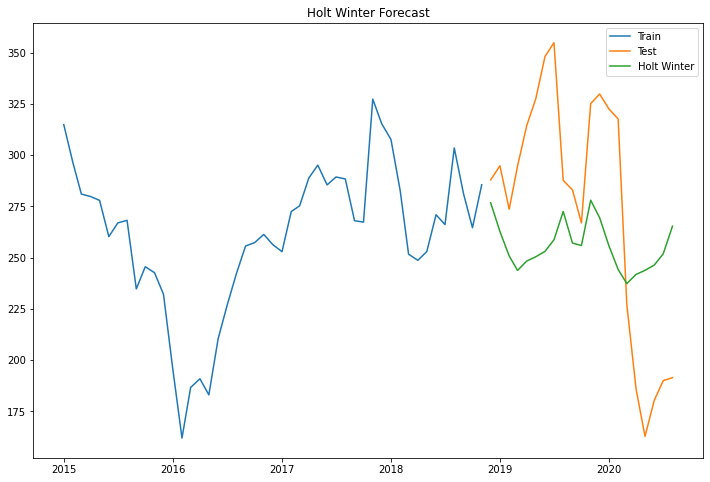

MSE = 3481.1352412873275
RMSE = 59.001146101472706


In [ ]:
Holt_Winter_forecasting(df1,'Price',0.7,12,'mul','mul')

ARMA MODEL:

In [ ]:
def ARMA_forecasting(mydf,colval,split, AR,I, MA):
    #print(split)
    import math
    from statsmodels.tsa.arima.model import ARIMA
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    model = ARIMA(train[colval], order=(AR,I,MA))
    fit1 = model.fit()
    y_hat = test.copy()
    y_hat['ARMA'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['ARMA'], label='ARMA')
    plt.legend(loc='best')
    plt.title("Autoregressive Moving Average (ARMA) Forecast")
    plt.show()
    mse=mean_squared_error(test[colval], y_hat.ARMA)
    rmse = sqrt(mean_squared_error(test[colval], y_hat.ARMA))
    print('MSE = '+str(mse))
    print('RMSE = '+str(rmse))

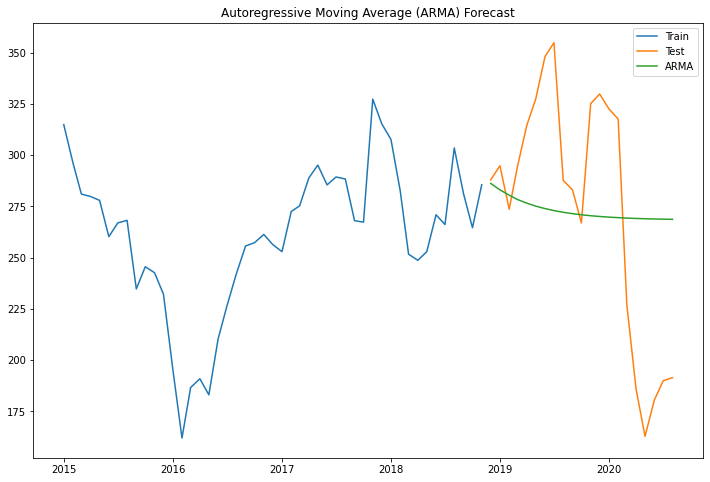

MSE = 3283.187983119261
RMSE = 57.29910979342751


In [ ]:
ARMA_forecasting(df1,'Price',0.7,1,0,1)

ARIMA MODEL:

Q. 3	Forecast about the stock price using ARIMA. Steps to be performed:

a.	Parameter Selection using gridsearch



In [ ]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)
import itertools
#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df1, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:955.835487262691
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:907.3199175233674
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:638.9607159845987
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:615.7330601383027
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:807.6859040129139
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:786.26001076867
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:613.3821056862403
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:615.5755254864345
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:870.5433881177644
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:825.4926234147749
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:591.6297746825753
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:570.8192240813645
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:743.9626058079529
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:749.5927331595908
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:569.489720826721
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:570.1490948264321
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:616.2104617211152
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:617.6551343020443
ARIMA(0, 1, 0)

b.	Fit ARIMA model as per the selected optimum value of parameters

In [ ]:
def ARIMA_forecasting(mydf,colval,split, AR, I, MA):
    #print(split)
    import math
    from statsmodels.tsa.arima.model import ARIMA
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    model = ARIMA(train[colval], order=(AR,I,MA),seasonal_order=(AR,I,MA,12))
    fit1 = model.fit()
    y_hat = test.copy()
    y_hat['ARIMA'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['ARIMA'], label='ARIMA')
    plt.legend(loc='best')
    plt.title("ARIMA Forecast")
    plt.show()
    mse=mean_squared_error(test[colval], y_hat.ARIMA)
    rmse = sqrt(mean_squared_error(test[colval], y_hat.ARIMA))
    print('\nMSE = '+str(mse))
    print('RMSE = '+str(rmse))
    


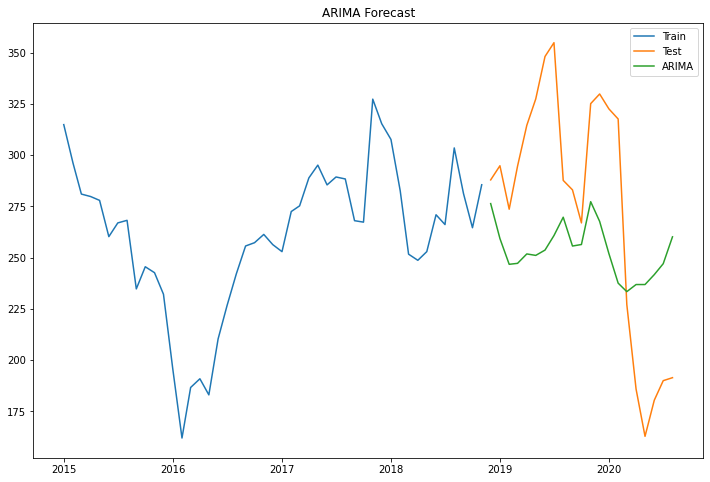


MSE = 3360.3670839474958
RMSE = 57.96867329814868


In [ ]:
ARIMA_forecasting(df1,'Price',0.7,1,1,1)

d.	Calculate the MSE and RMSE

In [ ]:
results = pd.DataFrame({'Models':['MA','NB','AR','SES','HOLT','HOLT_WINTER','ARMA','ARIMA'],'MSE':['3523.12','3558.88','3703.78','3504.78','3576.44','3481.13','3283.18','3360.36'],'RMSE':['59.35','59.65','60.85','59.20','59.80','59.00','57.30','57.96']})
results.sort_values(by='RMSE',ascending=True)

,Models,MSE,RMSE
6,ARMA,3283.18,57.30
7,ARIMA,3360.36,57.96
5,HOLT_WINTER,3481.13,59.00
3,SES,3504.78,59.20
0,MA,3523.12,59.35
1,NB,3558.88,59.65
4,HOLT,3576.44,59.80
2,AR,3703.78,60.85


result= ARIMA(df1, order=(3,1,9))
result= result.fit()
print(result.summary().tables[1])

c.	Validate forecast

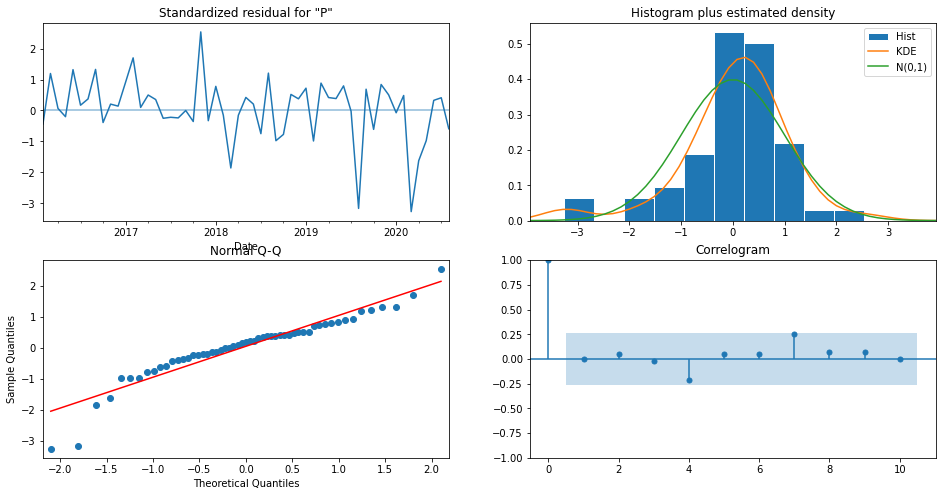

In [ ]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [ ]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Price,upper Price
Date,,
2017-01-01,154.150705,288.771840
2017-02-01,183.349183,278.838123
2017-03-01,225.202136,320.514109
2017-04-01,229.101424,324.409431
2017-05-01,238.897072,334.204989
2017-06-01,243.971842,339.279757
2017-07-01,247.049087,342.357002
2017-08-01,246.576821,341.884736
2017-09-01,220.389228,315.697143


e.	Visualize the forecast

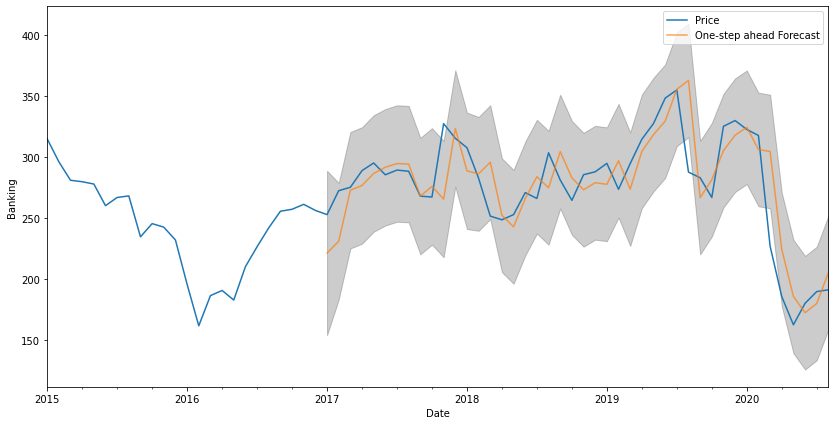

In [ ]:
#Visualize the forecasting
ax = df1['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Banking')
plt.legend()
plt.show()